# Finite Difference

We approximate the derivative $f'(x)$ of the function $f(x) = sin(x)$ at $x_0 = 1.2$ using a first order forward finite difference scheme,i.e.
$$f'(x) \approx \frac{f(x+h)-f(x)}{h}$$

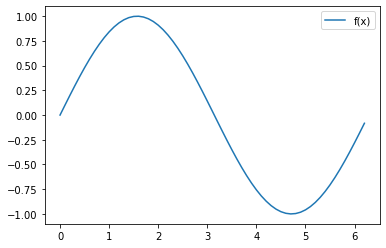

In [1]:
import matplotlib.pyplot as plt
from math import pi, sin, cos, log

def f(x):
    return sin(x)
hx=0.1; a=0; b=2*pi;
X = [a+n*hx for n in range(int((b-a)/hx)+1)]
Y = [f(x) for x in X]
plt.plot(X,Y)
plt.legend(["f(x)"])

We compute the actual derivative to have an error bench mark for the finite difference scheme.

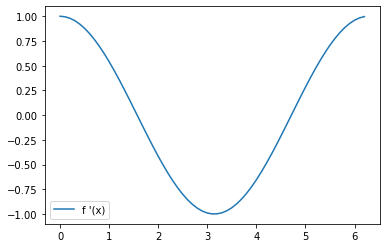

In [2]:
def df(x):
    return cos(x)
X = [a+n*hx for n in range(int((b-a)/hx)+1)]
Y = [df(x) for x in X]
plt.plot(X,Y)
plt.legend(["f '(x)"])

We create a function that return the derivative computed using the finite difference:

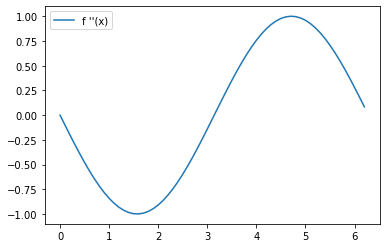

In [3]:
def diff(f,h):
    def df(x):
        return (1/h)*(f(x+h)-f(x))
    return df
d2f = diff(df,0.001)
X = [a+n*hx for n in range(int((b-a)/hx)+1)]
Y = [d2f(x) for x in X]
plt.plot(X,Y)
plt.legend(["f ''(x)"])

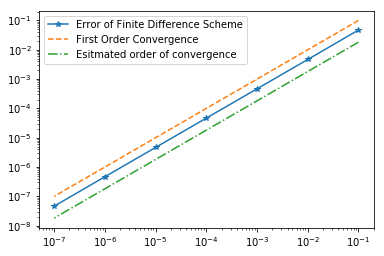

In [6]:
H = [];
err = [];
x0 = 1.2;
for k in range(1,8):
    h = 10**(-k);
    H = H+[h];
    dfh = diff(f,h);
    err = err+[abs(dfh(x0)-df(x0))]
plt.loglog(H,err,"*-")
plt.loglog(H,H,"--")
plt.loglog(H,[abs(-0.5*cos(x0)*h) for h in H],"-.")
plt.legend(["Error of Finite Difference Scheme","First Order Convergence","Esitmated order of convergence"])
slope = log(err[-1]/err[0])/log(H[-1]/H[0])

__A1__ We observe that the approximation of the derivative using the finite difference schemes improves as $h$ gets smaller, in particular we observe that the approximation error, $e_h = \Big|\;f'(x0)- \frac{f(x0+h)-f(x0)}{h}\;\Big|$, has the following property $e_h=\mathcal{O}(h)$. The slope of the linear interpolation is {{slope}}.

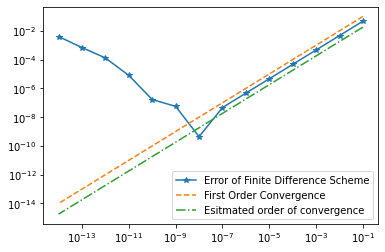

In [4]:
H = [];
err = [];
x0 = 1.2;
for k in range(1,15):
    h = 10**(-k);
    H = H+[h];
    dfh = diff(f,h);
    err = err+[abs(dfh(x0)-df(x0))]
plt.loglog(H,err,"*-")
plt.loglog(H,H,"--")
plt.loglog(H,[abs(-0.5*cos(x0)*h) for h in H],"-.")
plt.legend(["Error of Finite Difference Scheme","First Order Convergence","Esitmated order of convergence"])

__A2__ We observe that for $h$ smaller then e-8 the approximation error stop diminishing and actually start getting bigger. This is due to the _cancellation_, i.e. since we are taking a very small $h$ we end up having $f(x+h)$ that differs to $f(x)$ only by roundoff error and this error is amplified by a big factor $1/h$. To be more convinced that cancellation is the phenomena we are observing we do a further numerical experiment. In particular we check if with a less precise floating point arithmetics the _cancellation_ phenomena start sooner.

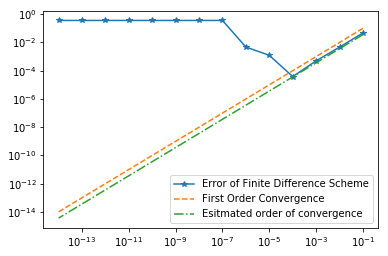

In [9]:
from numpy import float32, sin, cos
def f(x):
    return float32(sin(float32(x)))
def diff(f,h):
    def df(x):
        return (1/float32(h))*(f(x+h)-f(x))
    return df
H = [];
err = [];
x0 = 1.2;
for k in range(1,15):
    h = 10**(-k);
    H = H+[h];
    dfh = diff(f,h);
    err = err+[abs(dfh(x0)-df(x0))]
plt.loglog(H,err,"*-")
plt.loglog(H,H,"--")
plt.loglog(H,[abs(-cos(x0)*h) for h in H],"-.")
plt.legend(["Error of Finite Difference Scheme","First Order Convergence","Esitmated order of convergence"])

We now do the same computation in term of relative error rather then in term of absolute error, in particular we observe the same phenomena using absolute and relative error.

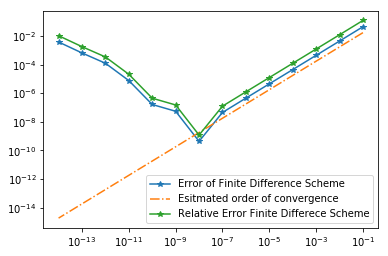

In [10]:
def f(x):
    return sin(x)
def df(x):
    return cos(x)
def diff(f,h):
    def df(x):
        return (1/h)*(f(x+h)-f(x))
    return df
H = [];
err = [];
rel = [];
x0 = 1.2;
for k in range(1,15):
    h = 10**(-k);
    H = H+[h];
    dfh = diff(f,h);
    err = err+[abs(dfh(x0)-df(x0))]
    rel = rel+[abs(1-dfh(x0)/df(x0))]
plt.loglog(H,err,"*-")
plt.loglog(H,[abs(-0.5*cos(x0)*h) for h in H],"-.")
plt.loglog(H,rel,"*-")
plt.legend(["Error of Finite Difference Scheme","Esitmated order of convergence","Relative Error Finite Differece Scheme"])

__A3__ Repeating the experiment with $g(x)$ we observe the effect of the term $f''(x)$ in the error estimate.

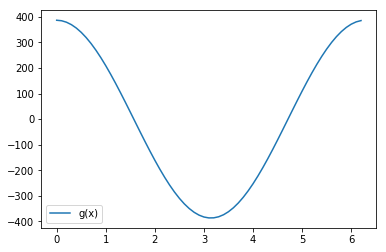

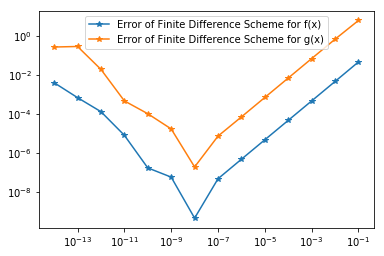

In [24]:
def f(x):
    return 386.98*cos(x)
X = [a+n*hx for n in range(int((b-a)/hx)+1)]
Y = [f(x) for x in X]
plt.plot(X,Y)
plt.legend(["g(x)"])

plt.figure()
def df(x):
    return -386.98*sin(x);

H = [];
err2 = [];
x0 = 1.2;
for k in range(1,15):
    h = 10**(-k);
    H = H+[h];
    dfh = diff(f,h);
    err2 = err2+[abs(dfh(x0)-df(x0))]
plt.loglog(H,err,"*-")
plt.loglog(H,err2,"*-")
plt.legend(["Error of Finite Difference Scheme for f(x)","Error of Finite Difference Scheme for g(x)"])
slope = log(err[-1]/err[0])/log(H[-1]/H[0])